# Lab 3 


**Lab 3**
Assignment Objectives:  
Upon successful completion of this assignment, a student will be able to:
* Gain experience using and writing functions.
* Use basic statistical functions
* Gain experience in exploratory data visualization
* Use basic data cleaning.

In [1]:
#  Import libraries 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import otter
grader = otter.Notebook()

*Tip: It is good practice to list all imports needed at the top of the notebook.  You can import modules in later cells as needed, but listing them at the top clearly shows all which are needed to be available / installed.*

### Data Set - Mushroom

You will be using the [Seconday Mushroom Dataset](https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset) available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/)

Please use the mushroom data files in your "data" folder. 




### Exercise 1: Import Data 
You will want to create a function to import the data 

The function should be named `ImportDataMushroom(filepath)`    
`ImportDataMushroom` has one input arguments: 
* `filepath` - a string that links to the data to be imported 

In the function, you should import the data using `read_csv`. You may need to use additional arguments in order to properly read in the data.  But let the function use it default reasoning on `na_values`.

The function should return the DataFrame. 

Helpful links: 

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

In [2]:
# Create the function ImportData here and return the data 

def ImportDataMushroom(filepath):
    # return the created DataFrame, df 
    df = pd.read_csv(filepath, sep = ';')
    
    return df

filepath = "./data/secondary_data.csv"
data = ImportDataMushroom(filepath)
data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [3]:
grader.check("q1")

q1 results: All test cases passed!

### Exercise 2: Data Exploration


You will want to explore if this data has any missing data.  And if it does, handle the missing values. 

#### Exercise 2a: Columns with Missing Data

First, you will determine whether each column has any missing values (a Boolean for each column). 

`col_missing_data` should be a DataSeries with each column name as an index value and Booleans for whether there is any missing data. 

You may want to consider the `isnull` or `isna` functions. 

**Caution:** Make sure to use the DataFrame `data` this frame is created using the `ImportDataMushroom` function.  Do not use `df` which is local to the function.  

In [4]:
col_missing_data = data.isnull().any()
col_missing_data

class                   False
cap-diameter            False
cap-shape               False
cap-surface              True
cap-color               False
does-bruise-or-bleed    False
gill-attachment          True
gill-spacing             True
gill-color              False
stem-height             False
stem-width              False
stem-root                True
stem-surface             True
stem-color              False
veil-type                True
veil-color               True
has-ring                False
ring-type                True
spore-print-color        True
habitat                 False
season                  False
dtype: bool

Reference: https://note.nkmk.me/en/python-pandas-nan-extract/

In [5]:
grader.check("q2a")

q2a results: All test cases passed!

#### Exercise 2b: Amount of Missing Data 

It is good to understand where and how your data is missing.  For instance are there any patterns to how it is missing?  

Let's establish the amount of missing data. 

61069

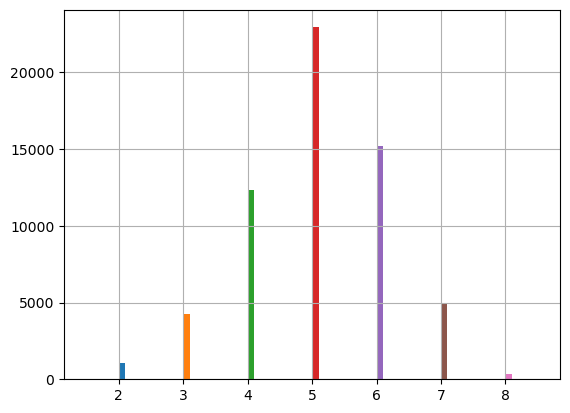

In [6]:
counts = data.isna().sum(axis=1)
num_rows_missing_graph = data.isna().sum(axis=1).groupby(counts).hist();
# this shows the distribution of nans is somewhat normally distributed


num_rows_missing = data.isna().sum(axis=1).count()
num_rows_missing

In [7]:
grader.check("q2b")

q2b results: All test cases passed!

The amount of missing data precludes eliminating the missing data, therefore additional analysis steps should understand there may be missing values. 

#### Exercise 2c: Types of Data

Now you will explore the types of data in each column.  Does this match your expectations, look at the information provided in the data folder in `secondary_data_meta.txt`. 

In [8]:
col_types = data.dtypes
col_types
# Yes, the types match our expectations. The continous variables are float64 and the categorical variables are objects. 

class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [9]:
grader.check("q2c")

q2c results: All test cases passed!

### Exercise 3: Data Exploration and Visualization



#### Exercise 3a: Statistics 

Let's explore the properties of the `cap-diameter` variable.  

First, calculate the mean and standard deviation for this variable.  

Report (True / False) if there is any missing data in this column. 

In [10]:
mean_cap_diam = data['cap-diameter'].mean()
std_cap_diam = data['cap-diameter'].std()
miss_cap_diam = data['cap-diameter'].isnull().any()
# False, there are no missing data in the column. 
print('Mean cap-diameter: %.4f\nstd cap-diamter:   %.4f\n' % 
      (mean_cap_diam, std_cap_diam))

Mean cap-diameter: 6.7339
std cap-diamter:   5.2648



In [11]:
grader.check("q3a")

q3a results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Exercise 3b: Visualization 

Let's know look at the distribution of values for the cap diameter. 

Create a histogram with an appropriate number of bins for this data. 

Make sure the plot looks "good" and has labels, title, etc. 

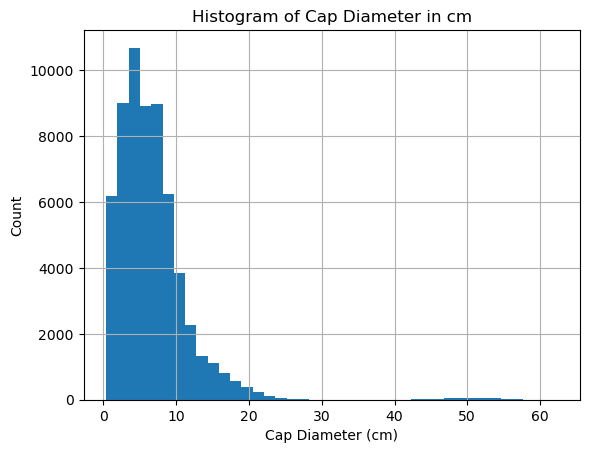

In [12]:
# Create the requested plot
data['cap-diameter'].hist(bins= 40);
plt.title('Histogram of Cap Diameter in cm');
plt.xlabel('Cap Diameter (cm)');
plt.ylabel('Count');

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Exercise 3c: Visualiation 

Let's look at another variable `cap-shape`.  This is a categorical variable (specifically a nominal variable). 

Plot the number of samples of each type of shape (suggest using a bar plot). 

You should use the full names for each type of `cap-shape`, e.g., `bell`, `conical`, `convex`, etc. 

You will find the `xticks()` function useful  
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html#matplotlib.pyplot.xticks



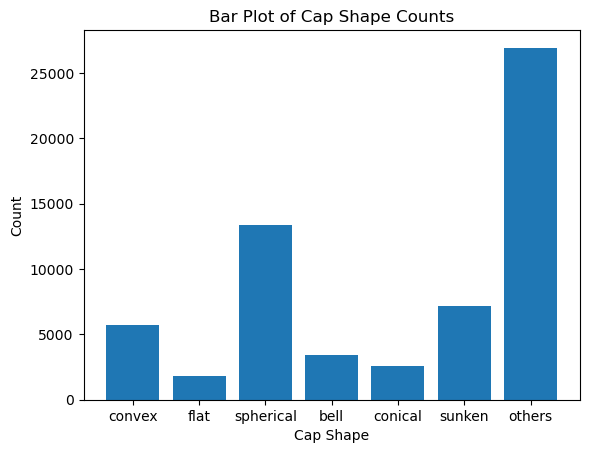

In [13]:
# Create the requested plot
names = { 'x':'convex' , 'f':'flat', 'p':'spherical', 'b':'bell', 'c':'conical', 's':'sunken','o':'others'};
names2 = list(names.keys())
values = list(names.values())
counts = data.groupby('cap-shape').size()
plt.bar(values,counts)
plt.title('Bar Plot of Cap Shape Counts');
plt.xlabel('Cap Shape');
plt.ylabel('Count');

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Exercise 3d: Visualization 

Let's now look to plot overlapping density plots of the `cap-diameter` variable by the mushroom `cap-shape`. 

Use the full shape name when appropriate on your plot. 

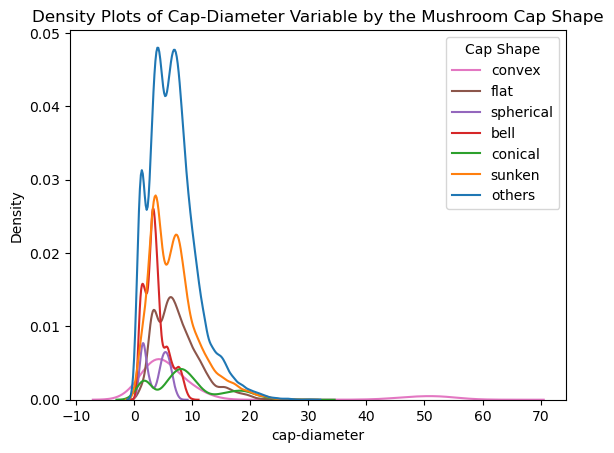

In [14]:
# Create the requested plot
sns.kdeplot(data, x = 'cap-diameter', hue = 'cap-shape');
plt.legend( title = 'Cap Shape', labels = values);
plt.title('Density Plots of Cap-Diameter Variable by the Mushroom Cap Shape');

<!-- END QUESTION -->

## Data Set - Auto-MPG 

For the remaining problems, you will using the Auto-MPG data set available in the UCI ML Repository. 

https://archive.ics.uci.edu/ml/datasets/Auto+MPG

### Exercise 4: Import Data 

You will want to create a function to import the data 

The function should be named `ImportDataAuto(filepath, col_names)`    
`ImportDataAuto` has one input arguments: 
* `filepath` - a string that links to the data or url to be imported, 
* `col_names` = a list of strings with the column names. 

In the function, you should import the data using `read_csv`. You may need to use additional arguments in order to properly read in the data.  But let the function use it default reasoning on `na_values`.

The column names should be set to: 'mpg', 'cyl', 'disp', 'hp', 'weight', 'accel', 'model year', 'origin', 'car name'. 

The function should return the DataFrame. 

Helpful links: 

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv

In [15]:
# Create the function ImportDataAuto here and return the data 

def ImportDataAuto(filepath, col_names):
    # return the created DataFrame, df 
    df = pd.read_csv(url, header = None, names = cNames, delimiter='\s+')
    
    return df

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'  
cNames = ['mpg', 'cyl', 'disp', 'hp', 'weight', 'accel', 'model year', 'origin', 'car name']
data = ImportDataAuto(url, cNames)
data.head()

,mpg,cyl,disp,hp,weight,accel,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


#reference : https://www.geeksforgeeks.org/how-to-read-space-delimited-files-in-pandas/

In [16]:
grader.check("q4")

q4 results: All test cases passed!

### Exercise 5: Data Exploration

#### Exercise 5a: Columns with Missing Data 
First, you will determine whether each column has any missing values (a Boolean for each column).

`auto_col_missing_data` should be a DataSeries with each column name as an index value and Booleans for whether there is any missing data.

You may want to consider the `isnull` or `isna` functions.


In [17]:
auto_col_missing_data = data.isnull().any()
auto_col_missing_data

mpg           False
cyl           False
disp          False
hp            False
weight        False
accel         False
model year    False
origin        False
car name      False
dtype: bool

In [18]:
grader.check("q5a")

q5a results: All test cases passed!

#### Exercise 5b: Types of Data 

Now you will explore the types of data in each column.  Store the results in `auto_col_types`.

In [19]:
auto_col_types = data.dtypes
auto_col_types

mpg           float64
cyl             int64
disp          float64
hp             object
weight        float64
accel         float64
model year      int64
origin          int64
car name       object
dtype: object

In [20]:
grader.check("q5b")

q5b results: All test cases passed!

**What is wrong with this information?** 

Horsepower, `hp` is considered an object.  But, this should be a float.  What is the problem?

In [21]:
data[data['hp'] == '?']

,mpg,cyl,disp,hp,weight,accel,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


There are some missing values in this column that need to be handled.

We could change our import function to recognize "?" values as `NaN`.  Here let's instead create a function that replaces the "?" values after the data is imported.  



#### Exercise 5c: Handle Missing Data 

Create a function `HandleQuestionMark(df, col)`, that changes all the "?" values to a replacement value 99 and converts the column to be a float, where
* `df` is a DataFrame to be worked on 
* `col` is the name of the column to be "handled"

*Note* In practice, you most likely do not want to replace the missing values with a replacement as given.  As it will throw of the distribution.  

In [22]:
def HandleQuestionMark(df, col):
    # Guarding 
    if (df[col].dtypes == 'object'):
        print ("  Current data type is : ", df[col].dtypes)
        a = df[df[col] == '?'].index.tolist()
        b = data.columns.get_loc(col)
        df.iloc[a,b] = df.iloc[a,b].replace('?',99)
        df[[col]] = df[[col]].astype(float)
        print ("  Changed data type is : ", df[col].dtypes)
        
    return df 

HandleQuestionMark(data, 'hp')
print(data.dtypes)
print(data.head())

  Current data type is :  object
  Changed data type is :  float64
mpg           float64
cyl             int64
disp          float64
hp            float64
weight        float64
accel         float64
model year      int64
origin          int64
car name       object
dtype: object
    mpg  cyl   disp     hp  weight  accel  model year  origin   
0  18.0    8  307.0  130.0  3504.0   12.0          70       1  \
1  15.0    8  350.0  165.0  3693.0   11.5          70       1   
2  18.0    8  318.0  150.0  3436.0   11.0          70       1   
3  16.0    8  304.0  150.0  3433.0   12.0          70       1   
4  17.0    8  302.0  140.0  3449.0   10.5          70       1   

                    car name  
0  chevrolet chevelle malibu  
1          buick skylark 320  
2         plymouth satellite  
3              amc rebel sst  
4                ford torino  


#references : https://saturncloud.io/blog/how-to-get-column-index-from-column-name-in-python-pandas/#:~:text=The%20easiest%20way%20to%20get,Series%20based%20on%20its%20label.

In [23]:
grader.check("q5c")

q5c results: All test cases passed!

#### Exercise 5d: Data Manipulation 

Let's update the data in several ways. 

Create a function `StringDataClean(df)` that: 

* Change the column labels (headers) from all lower case to [title case](https://danielmiessler.com/p/a-list-of-different-case-types/) and then replace "space" with underscore, "_". Print the column headers before and after.
* Set the DataFrame index (row labels) to the information in `Car_Name`. 
* Change the DataFrame index (row labels) also be title case, that is, replace all spaces with underscore

In [25]:
def StringDataClean(df):
    print("*** String Operations on Column Headers ***")
    print("  Before: ", df.columns)
    #df.columns = ['Mpg','Cyl', 'Disp', 'Hp', 'Weight', 'Accel', 'Model_Year','Origin','Car_Name']
    newColumns = [column.replace(' ', '_').title() for column in df.columns]
    df.columns = newColumns
    print("  After: ", df.columns)

    # Set the DataFrame index 
    df.set_index(df['Car_Name'],inplace = True)
    # Change the DataFrame index
    newindex = [row.replace(' ', '_').title() for row in df.index]
    df.index = newindex
    return df

data = StringDataClean(data)

data.head()

*** String Operations on Column Headers ***
  Before:  Index(['mpg', 'cyl', 'disp', 'hp', 'weight', 'accel', 'model year', 'origin',
       'car name'],
      dtype='object')
  After:  Index(['Mpg', 'Cyl', 'Disp', 'Hp', 'Weight', 'Accel', 'Model_Year', 'Origin',
       'Car_Name'],
      dtype='object')


,Mpg,Cyl,Disp,Hp,Weight,Accel,Model_Year,Origin,Car_Name
Chevrolet_Chevelle_Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
Buick_Skylark_320,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
Plymouth_Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
Amc_Rebel_Sst,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
Ford_Torino,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [26]:
grader.check("q5d")

q5d results: All test cases passed!

### Exercise 6: Data Exploration and Visualization 

Let's explore the data with some visualizations. 

<!-- BEGIN QUESTION -->

#### Exercise 6a: Data Exploration and Analysis 

Create a function `plot_mpg_origin()` that reports the mpg over the grouping `Origin`.  Consider using line, bar, scatter plots.  

The function should: 

* take as input a DataFrame 
* report mean mpg over the group
* replace the origin code with strings of the region of origin:
    * 1 -> "USA"
    * 2 -> "Europe"
    * 3 -> "Asia" 
* make sure the plot looks good and has labels, title, etc. 

(<Axes: title={'center': 'Mpg'}, xlabel='Origin'>,
 Origin
 1    20.083534
 2    27.891429
 3    30.450633
 Name: Mpg, dtype: float64)

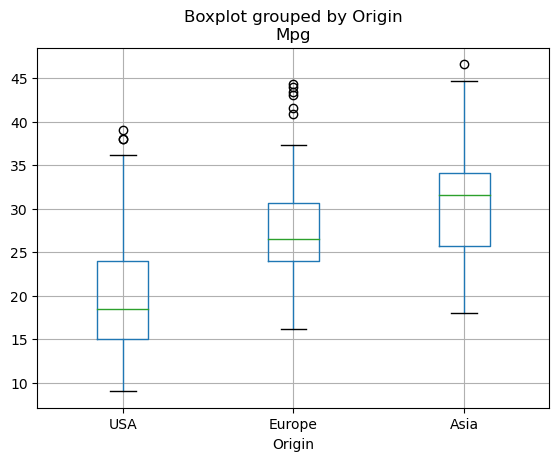

In [27]:
def plot_mpg_origin(df):
    #df['Origin'] = df['Origin'].replace({1:'USA',2:'Europe',3:'Asia'});
    plot = df.boxplot(by='Origin', column = 'Mpg');
    plt.xticks([1, 2, 3], ["USA", "Europe", "Asia"])
    Mean_by_Origin = df['Mpg'].groupby(df['Origin']).mean();
    
    
    return  plot , Mean_by_Origin;


plot_mpg_origin(data)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Exercise 6b: Data Exploration and Analysis 

Create a function `plot_mpg_year()` that reports the mpg over the grouping `Model Year`.  Consider using line, bar, scatter plots.  

The function should: 

* take as input a DataFrame
* report mean mpg over the group 
* make sure the plot looks good and has labels, title, etc. 

Model_Year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.696552
81    30.334483
82    31.709677
Name: Mpg, dtype: float64


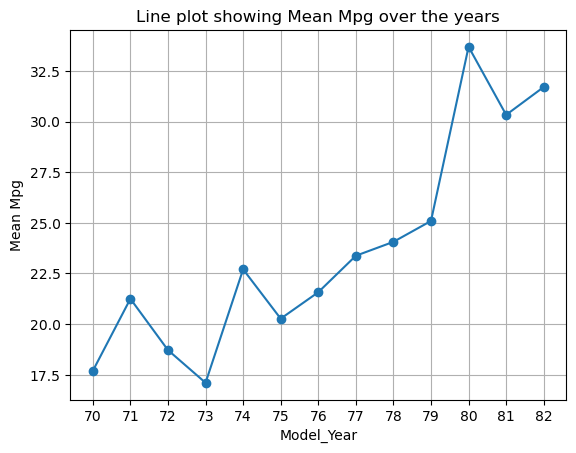

In [28]:
def plot_mpg_year(df):
    mpg_by_year = df['Mpg'].groupby(df['Model_Year']).mean()
    line_plot = mpg_by_year.plot.line(marker='o')
    plt.xticks(mpg_by_year.index)
    plt.ylabel('Mean Mpg')
    plt.title('Line plot showing Mean Mpg over the years')
    plt.grid(True)
    print(mpg_by_year)
    return line_plot

plot_mpg_year(data);

In [ ]:
def plot_mpg_year(df):
    
    
    return 


plot_mpg_year(data)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

#### Exercise Bonus: Data Exploration and Analysis 

Create a function `plot_mpg_year_region()` that reports the mpg over the both groupings `Model Year` and `Region`.  Think about what is the appropriate type of plot.  

The function should: 

* take as input the DataFrame 
* report mpg over both groups
* make sure the plot looks good and has labels, title, etc. 

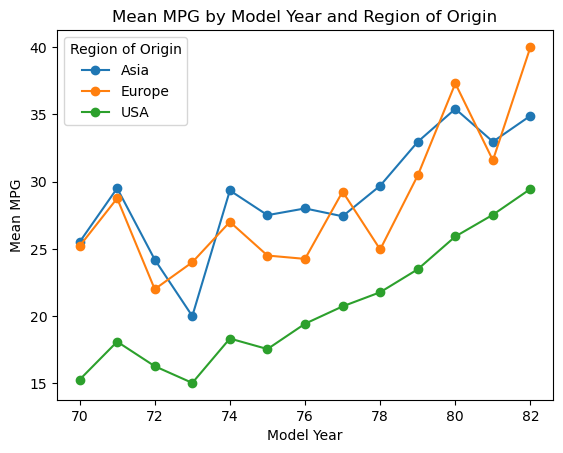

In [31]:
def plot_mpg_year_region(df):
    df['Origin'] = df['Origin'].replace({1: "USA", 2: "Europe", 3: "Asia"})
    mean_mpg = df.groupby(['Model_Year', 'Origin'])['Mpg'].mean().unstack()

    mean_mpg.plot(kind='line', marker='o')
    plt.title('Mean MPG by Model Year and Region of Origin')
    plt.xlabel('Model Year')
    plt.ylabel('Mean MPG')
    plt.legend(title='Region of Origin')
   
    plt.show()
   
    
    
    return 


plot_mpg_year_region(data)

<!-- END QUESTION -->

## Congratulations! You have finished Lab3! 

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the Lab 3 assignment on Gradescope, Gradescope will automatically submit a PDF file with your some of your answers to the Lab 3 - Figures assignment (making them easier to grade). 

**Important**: Please check that your responses were generated and submitted correctly to the Lab 3 - Figures Assignment. 

**You are responsible for ensuring your submission follows our requirements and that the PDF for Lab 3 - Figures answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with the submission, contact course staff well-ahead of the deadline. 

Make sure you have run all cells in your notebook **in order** before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()